<a href="https://colab.research.google.com/github/rohan-r-kulkarni/bigtech_randomforest/blob/main/Tejas_latest_bigtech_rf_ver5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import requests

In [163]:
url= "https://raw.githubusercontent.com/rohan-r-kulkarni/bigtech_randomforest/main/data.csv"
df = pd.read_csv(url)
df1=df.reset_index()
df1

,index,Unnamed: 0,AAPL US Equity,AAPL US Equity.1,AAPL US Equity.2,AAPL US Equity.3,AAPL US Equity.4,AAPL US Equity.5,AAPL US Equity.6,AAPL US Equity.7,...,SPX Index.1,SPX Index.2,SPX Index.3,SPX Index.4,SPX Index.5,SPX Index.6,SPX Index.7,SPX Index.8,SPX Index.9,SPX Index.10
0,0,NaN,1,2,3,4,5,6,7,8,...,2,3,4,5,6,7,8,9,10,11
1,1,Dates,PX_OPEN,PX_OFFICIAL_CLOSE,PE_RATIO,EV_EBITDA_ADJUSTED,SALES_GROWTH,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,...,PX_OFFICIAL_CLOSE,PE_RATIO,EV_EBITDA_ADJUSTED,SALES_GROWTH,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,PROF_MARGIN,EBITDA_TO_REVENUE,BEST_PX_SALES_RATIO
2,2,1/3/00,0.936,NaN,39.6143,NaN,37.0175,17999.4376,535819200,5.1223,...,NaN,28.1209,NaN,NaN,NaN,1071554100,2.99,7.61,NaN,NaN
3,3,1/4/00,0.967,NaN,36.2744,NaN,37.0175,16481.8971,511728000,5.5939,...,NaN,28.1744,NaN,NaN,NaN,1264023700,2.99,7.61,NaN,NaN
4,4,1/5/00,0.926,NaN,36.8052,NaN,37.0175,16723.0956,778321600,5.5133,...,NaN,28.2119,NaN,NaN,NaN,1177726200,2.98,7.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,11/28/22,145.14,144.22,23.6039,18.0919,8.1406,2294268.778,69346522,4.754,...,NaN,19.1332,NaN,NaN,34556774.68,517449991,4.95,11.17,NaN,2.2736
5978,5978,11/29/22,144.29,141.17,23.1047,18.0919,8.1406,2245749.018,83763803,4.8567,...,NaN,19.7254,NaN,NaN,35624829.34,1406250061,4.8,11.17,NaN,2.343
5979,5979,11/30/22,141.395,148.03,24.2275,18.0919,8.1406,2354878.708,111380880,4.6316,...,NaN,19.7083,NaN,NaN,35596739.87,633969105,4.8,11.17,NaN,2.3389
5980,5980,12/1/22,148.21,148.31,24.2733,18.0919,8.1406,2359332.981,71250416,4.6229,...,NaN,19.6847,NaN,NaN,35596739.87,633969105,4.81,11.17,NaN,2.336


In [164]:
df1.columns

Index(['index', 'Unnamed: 0', 'AAPL US Equity', 'AAPL US Equity.1',
       'AAPL US Equity.2', 'AAPL US Equity.3', 'AAPL US Equity.4',
       'AAPL US Equity.5', 'AAPL US Equity.6', 'AAPL US Equity.7',
       ...
       'SPX Index.1', 'SPX Index.2', 'SPX Index.3', 'SPX Index.4',
       'SPX Index.5', 'SPX Index.6', 'SPX Index.7', 'SPX Index.8',
       'SPX Index.9', 'SPX Index.10'],
      dtype='object', length=123)

In [165]:
df2=df1.rename(columns={"Unnamed: 0": "Dates"})
dates=df2.loc[2:, "Dates"].reset_index(drop=True)
dates=pd.to_datetime(dates)
dates

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5975   2022-11-28
5976   2022-11-29
5977   2022-11-30
5978   2022-12-01
5979   2022-12-02
Name: Dates, Length: 5980, dtype: datetime64[ns]

In [166]:
spx_i = 10
spx_df = pd.DataFrame(df2.iloc[1: , 2+11*spx_i:].reset_index(drop=True))
spx_df.columns = spx_df.iloc[0, :]
#spx_df.columns = spx_df.loc[1, :]
spx_df = pd.DataFrame(spx_df.iloc[1:, 0]).reset_index(drop=True)
spx_df

,PX_OPEN
0,1455.22
1,1399.42
2,1402.11
3,1403.45
4,1441.47
...,...
5975,3964.19
5976,3957.18
5977,4087.14
5978,4040.17


In [167]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
import yfinance as yf

stocks = {}
drop = ["SALES_GROWTH", "PROF_MARGIN", "EBITDA_TO_REVENUE","EV_EBITDA_ADJUSTED"]
names = []

for i in range(0, 10):
    this_name = df2.columns[2+11*i].split(" ")[0]

    this_df = df2.iloc[1: , 2+11*i:13+11*i].reset_index(drop=True)
    this_df.columns = this_df.loc[0, :]
    this_df = this_df.drop(drop, axis = 1)
    this_df = this_df.loc[1:, :].reset_index(drop=True)
    this_df = pd.concat([dates, this_df], axis=1)

    this_df = this_df.reindex(['Dates', 'PX_OPEN', 'PE_RATIO', 'CUR_MKT_CAP',
        'PX_VOLUME', 'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO','PX_OFFICIAL_CLOSE'],axis=1)
    
            
    this_df=this_df.set_index("Dates")
    this_df=this_df.astype(float)

    start_date = pd.to_datetime(this_df.index)[0]
    end_date = pd.to_datetime(this_df.index)[-1]
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    
    yf_data = yf.download(this_name, start=start_date, end=end_date)
    yf_data = yf_data.loc[:, ["High", "Low", "Adj Close"]]
    
    yf_data = yf_data.rename({"High": "HIGH", "Low":"LOW", "Adj Close": "ADJ_CLOSE"}, axis=1)
    
    this_df = this_df.join(yf_data)
    
#     this_df = this_df.dropna()

    if len(this_df) < 500:
        continue # do not include stocks with too small df
    
    names.append(this_name)

    stocks[this_name] = this_df
    
    
#stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [169]:
names

['AAPL', 'META', 'GOOG', 'AMZN', 'NFLX', 'TSLA', 'MSFT', 'NVDA', 'IBM', 'INTC']

<h1> Data processing done </h1>
<h1> Work with TSLA first </h1>

In [170]:
s = "TSLA"

In [171]:

# test=appl['Dates', 'PX_OPEN', 'PE_RATIO', 'CUR_MKT_CAP',
#        'PX_VOLUME', 'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO']
stocks[s]['ADJ_CLOSE']=stocks[s]['ADJ_CLOSE'].shift(-1)

In [172]:
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE
Dates,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997


<h2> Do shift of price series </h2>

In [173]:
day_change = stocks[s].loc[:,"ADJ_CLOSE"] - stocks[s].loc[:,"PX_OPEN"] #close - open
buy_indicator = (day_change>0).astype(int)
stocks[s]=stocks[s].assign(day_change=day_change)
stocks[s]=stocks[s].assign(buy_indicator=buy_indicator)

# stocks[s] = stocks[s].dropna()
# buy_indicator = buy_indicator.dropna()
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator
Dates,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0


<h2>1. OBV </h2>

In [174]:
obv = stocks[s].copy().loc[:, ["PX_VOLUME", "ADJ_CLOSE"]]
obv

,PX_VOLUME,ADJ_CLOSE
Dates,,
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
2000-01-06,NaN,NaN
2000-01-07,NaN,NaN
...,...,...
2022-11-28,83357111.0,180.830002
2022-11-29,109186404.0,194.699997
2022-11-30,80046213.0,194.699997


In [175]:
obv=obv.assign(prev_close=obv.loc[:, "ADJ_CLOSE"].shift(1))
vols=obv.loc[:, "PX_VOLUME"].shift(1)
vols.values[0] = 0
vols
obv=obv.assign(prev_vol=vols)

In [176]:
obv

,PX_VOLUME,ADJ_CLOSE,prev_close,prev_vol
Dates,,,,
2000-01-03,NaN,NaN,NaN,0.0
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-11-28,83357111.0,180.830002,182.919998,93038148.0
2022-11-29,109186404.0,194.699997,180.830002,83357111.0
2022-11-30,80046213.0,194.699997,194.699997,109186404.0


In [177]:
def calc_obv(x):
    if x.ADJ_CLOSE > x.prev_close:
        return x.prev_vol + x.PX_VOLUME
    elif x.ADJ_CLOSE < x.prev_close:
        return x.prev_vol - x.PX_VOLUME
    else:
        return x.prev_vol

In [178]:
OBV_FIN=obv.apply(calc_obv, axis=1)
obv=obv.assign(OBV_FIN=OBV_FIN)
obv=obv.assign(close_change = obv.ADJ_CLOSE-obv.prev_close)
obv=obv.assign(volume_change = obv.PX_VOLUME-obv.prev_vol)

obv

,PX_VOLUME,ADJ_CLOSE,prev_close,prev_vol,OBV_FIN,close_change,volume_change
Dates,,,,,,,
2000-01-03,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-11-28,83357111.0,180.830002,182.919998,93038148.0,9681037.0,-2.089996,-9681037.0
2022-11-29,109186404.0,194.699997,180.830002,83357111.0,192543515.0,13.869995,25829293.0
2022-11-30,80046213.0,194.699997,194.699997,109186404.0,109186404.0,0.000000,-29140191.0


In [179]:
obv_indicator = ((obv.OBV_FIN.diff() > 0) & (obv.close_change > 0)).astype(int).shift(1)
obv_indicator

Dates
2000-01-03    NaN
2000-01-04    0.0
2000-01-05    0.0
2000-01-06    0.0
2000-01-07    0.0
             ... 
2022-11-28    1.0
2022-11-29    0.0
2022-11-30    1.0
2022-12-01    0.0
2022-12-02    0.0
Length: 5980, dtype: float64

In [180]:
stocks[s]=stocks[s].assign(OBV_indicator=obv_indicator)

In [181]:
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV_indicator
Dates,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0,1.0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1,0.0
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0,1.0


<h2>2. Bollinger Band </h2>

In [182]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
boll_df = stocks[s].copy()

In [183]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 10
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = boll_df['ADJ_CLOSE'].rolling(window).mean()
rolling_std = boll_df['ADJ_CLOSE'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
boll_df['Rolling Mean'] = rolling_mean
boll_df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
boll_df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

In [184]:
boll_indicator = ((boll_df.ADJ_CLOSE > 0) & (boll_df['Bollinger Low'] > 0)).astype(int).shift(1)
boll_df=boll_df.assign(Position=boll_indicator)


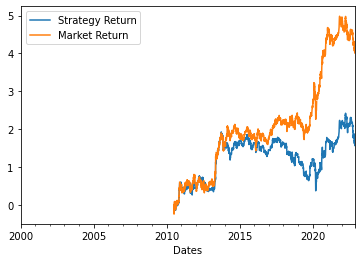

In [185]:
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
boll_df['Position'].fillna(method='ffill',inplace=True)
#Calculate the daily market return and multiply that by the position to determine strategy returns
boll_df['Market Return'] = np.log(boll_df['ADJ_CLOSE'] / boll_df['ADJ_CLOSE'].shift(1))
boll_df['Strategy Return'] = boll_df['Market Return'] * boll_df['Position'].shift(1)
#Plot the strategy returns
boll_df[['Strategy Return','Market Return']].cumsum().plot()

In [186]:
stocks[s]=stocks[s].assign(Bollinger_indicator=boll_indicator)

<h2>3. MACD (Exponential) </h2>

In [187]:
ema_12=stocks[s].loc[:, "ADJ_CLOSE"].ewm(min_periods=12, com=12-1).mean()
ema_26=stocks[s].loc[:, "ADJ_CLOSE"].ewm(min_periods=26, com=26-1).mean()

In [188]:
macd = ema_12-ema_26
signal_line=macd.ewm(min_periods=9, com=9-1).mean()

macd_indicator = ((macd > signal_line)).astype(int).shift(1)
macd_indicator

Dates
2000-01-03    NaN
2000-01-04    0.0
2000-01-05    0.0
2000-01-06    0.0
2000-01-07    0.0
             ... 
2022-11-28    0.0
2022-11-29    0.0
2022-11-30    0.0
2022-12-01    1.0
2022-12-02    1.0
Name: ADJ_CLOSE, Length: 5980, dtype: float64

In [189]:
stocks[s]=stocks[s].assign(MACD_indicator=macd_indicator)


<h2>4. Volume Weighted Average Price </h2>

In [190]:
vwap_df=stocks[s].copy().loc[:, ["HIGH", "LOW", "ADJ_CLOSE", "PX_VOLUME"]]
typ_price=vwap_df.loc[:, ["HIGH", "LOW", "ADJ_CLOSE"]].mean(axis=1)
vwap_df

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME
Dates,,,,
2000-01-03,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-11-28,188.500000,179.000000,180.830002,83357111.0
2022-11-29,186.380005,178.750000,194.699997,109186404.0
2022-11-30,194.759995,180.630005,194.699997,80046213.0


In [191]:
vol = vwap_df.loc[:, ["PX_VOLUME"]]
cum_tp = typ_price.cumsum()
cum_vol=vol.cumsum()
vwap_df = vwap_df.assign(cum_tp=cum_tp)
vwap_df = vwap_df.assign(cum_vol=cum_vol)

vwap_df

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME,cum_tp,cum_vol
Dates,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,180.830002,83357111.0,188083.112591,3.016479e+11
2022-11-29,186.380005,178.750000,194.699997,109186404.0,188269.722592,3.017571e+11
2022-11-30,194.759995,180.630005,194.699997,80046213.0,188459.752591,3.018371e+11


In [192]:
def calc_vwap(x):
    return (x.cum_tp * x.PX_VOLUME)/(x.cum_vol)

vwap_df=vwap_df.assign(VWAP=vwap_df.apply(calc_vwap, axis=1))
vwap_df

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME,cum_tp,cum_vol,VWAP
Dates,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,180.830002,83357111.0,188083.112591,3.016479e+11,51.974721
2022-11-29,186.380005,178.750000,194.699997,109186404.0,188269.722592,3.017571e+11,68.122658
2022-11-30,194.759995,180.630005,194.699997,80046213.0,188459.752591,3.018371e+11,49.978907


In [193]:
vwap_indicator = ((vwap_df.ADJ_CLOSE < vwap_df.VWAP)).astype(int).shift(1)
vwap_df=vwap_df.assign(VWAP_indicator=vwap_indicator)

vwap_df

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME,cum_tp,cum_vol,VWAP,VWAP_indicator
Dates,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,180.830002,83357111.0,188083.112591,3.016479e+11,51.974721,0.0
2022-11-29,186.380005,178.750000,194.699997,109186404.0,188269.722592,3.017571e+11,68.122658,0.0
2022-11-30,194.759995,180.630005,194.699997,80046213.0,188459.752591,3.018371e+11,49.978907,0.0


In [194]:
stocks[s]=stocks[s].assign(VWAP_indicator=vwap_indicator)

<h2>5. RSI </h2>

In [195]:
#RSI (Relative Strength Index)
def rsi(df, periods = 14, ema = True):
    #ema: exponential moving average (good lag indicators for stocks)
    #     not predictive of future prices; they simply highlight the trend that is being followed by the stock price
    
    close_delta = df['ADJ_CLOSE'].diff()
    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)    
    if ema == True:
        # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))

    return rsi


In [196]:
rsi_df=stocks[s].copy()
rsi_df['RSI'] = rsi(rsi_df, periods = 7, ema = True)

# Threshold for RSI: 30 < buy, 70 > sell
min_size=50
max_size=60

mask_more = ((rsi_df['RSI'] > max_size))

rsi_indicator = ((rsi_df['RSI'] > max_size)).astype(int).shift(1)
rsi_df=rsi_df.assign(RSI_buy_indicator=rsi_indicator)

rsi_df

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV_indicator,Bollinger_indicator,MACD_indicator,VWAP_indicator,RSI,RSI_buy_indicator
Dates,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0,1.0,0.0,0.0,0.0,42.264481,0.0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1,0.0,0.0,0.0,0.0,62.904637,0.0
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0,1.0,0.0,0.0,0.0,62.904637,1.0


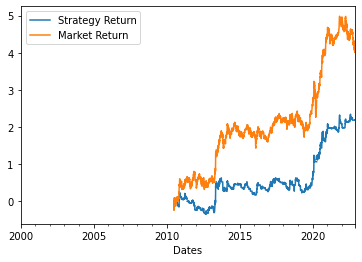

In [197]:

#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
rsi_df['RSI_buy_indicator'].fillna(method='ffill',inplace=True)
#Calculate the daily market return and multiply that by the position to determine strategy returns
rsi_df['Market Return'] = np.log(rsi_df['ADJ_CLOSE'] / rsi_df['ADJ_CLOSE'].shift(1))
rsi_df['Strategy Return'] = rsi_df['Market Return'] * rsi_df['RSI_buy_indicator'].shift(1)
#Plot the strategy returns
rsi_df[['Strategy Return','Market Return']].cumsum().plot()


In [198]:
stocks[s]=stocks[s].assign(RSI_indicator=rsi_indicator)

<h2>5. Money Flow Index (MFI) </h2>

In [199]:
mfi_df=stocks[s].copy()


In [200]:
# Money Flow Index (MFI)
### Oversold levels occur below 20 and overbought levels usually occur above 80
import matplotlib.pyplot as plt

def gain(x):
    return ((x > 0) * x).sum()

def loss(x):
    return ((x < 0) * x).sum()

# Calculate money flow index
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()


mfi_df['MFI'] = mfi(mfi_df['HIGH'], mfi_df['LOW'], mfi_df['PX_OFFICIAL_CLOSE'], mfi_df['PX_VOLUME'], 14)

mfi_indicator = ((mfi_df['MFI'] > 60)).astype(int).shift(1)
mfi_df=mfi_df.assign(MFI_buy_indicator=mfi_indicator)

mfi_df

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV_indicator,Bollinger_indicator,MACD_indicator,VWAP_indicator,RSI_indicator,MFI,MFI_buy_indicator
Dates,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0,1.0,0.0,0.0,0.0,1.0,NaN,0.0


In [201]:
stocks[s]=stocks[s].assign(MFI_indicator=mfi_indicator)
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV_indicator,Bollinger_indicator,MACD_indicator,VWAP_indicator,RSI_indicator,MFI_indicator
Dates,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0,1.0,0.0,0.0,0.0,0.0,0.0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0,1.0,0.0,0.0,0.0,1.0,0.0


<h2> Build independent, dependent variables and train/test split </h2>

In [202]:
###len(stocks[s]), len(stocks[s][stocks[s].buy_indicator==1])

In [203]:
#get indepdendent variables
# x = stocks[s][['PE_RATIO', 'CUR_MKT_CAP', 'PX_VOLUME',
#        'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO',
#                    'OBV_indicator',
#                    'Bollinger_indicator',
#                    'MACD_indicator', 'VWAP_indicator',
#                    'RSI_indicator', 'MFI_indicator'
#                   ]]

x = stocks[s][['PE_RATIO', 'CUR_MKT_CAP', 'PX_VOLUME',
       'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO',
                   'OBV_indicator',
                   'Bollinger_indicator',
                   'MACD_indicator', 'VWAP_indicator',
                   'RSI_indicator', 'MFI_indicator'
                  ]]

x = stocks[s][['OBV_indicator',
                   'Bollinger_indicator',
                   'MACD_indicator', 'VWAP_indicator',
                   'RSI_indicator', 'MFI_indicator'
                  ]]
x

y = stocks[s]['buy_indicator']
y

Dates
2000-01-03    0
2000-01-04    0
2000-01-05    0
2000-01-06    0
2000-01-07    0
             ..
2022-11-28    0
2022-11-29    1
2022-11-30    0
2022-12-01    0
2022-12-02    0
Name: buy_indicator, Length: 5980, dtype: int64

In [204]:
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV_indicator,Bollinger_indicator,MACD_indicator,VWAP_indicator,RSI_indicator,MFI_indicator
Dates,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,184.99,55.3159,571016.3754,83357111.0,1.5911,5.141,180.83,188.500000,179.000000,180.830002,-4.159998,0,1.0,0.0,0.0,0.0,0.0,0.0
2022-11-29,182.43,59.5587,614814.4018,109186404.0,1.4778,5.536,194.70,186.380005,178.750000,194.699997,12.269997,1,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-30,197.08,59.5587,614814.4018,80046213.0,1.4778,5.537,194.70,194.759995,180.630005,194.699997,-2.380003,0,1.0,0.0,0.0,0.0,1.0,0.0


In [205]:
x = x.dropna()
y = y[1:]

In [206]:
from sklearn.model_selection import train_test_split
#Get x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, train_size = 0.7, random_state=42)
#And check the shape
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4185, 6) (4185,)
(1794, 6) (1794,)


In [207]:
x_train

,OBV_indicator,Bollinger_indicator,MACD_indicator,VWAP_indicator,RSI_indicator,MFI_indicator
Dates,,,,,,
2013-02-18,0.0,0.0,1.0,0.0,0.0,0.0
2018-03-02,1.0,0.0,1.0,0.0,0.0,0.0
2012-09-19,0.0,1.0,1.0,0.0,1.0,0.0
2021-07-09,0.0,0.0,1.0,0.0,1.0,0.0
2007-07-11,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2014-06-19,1.0,1.0,1.0,0.0,1.0,0.0
2019-11-27,1.0,1.0,1.0,0.0,0.0,0.0
2020-01-15,0.0,1.0,1.0,1.0,1.0,0.0


<h3> RF classifier </h3>

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=80,max_depth=10,min_samples_leaf=1000,min_samples_split=4000)
rf.fit(x_train,y_train.astype(int))


RandomForestClassifier(max_depth=10, min_samples_leaf=1000,
                       min_samples_split=4000, n_estimators=80,
                       random_state=42)

In [209]:
y_test_pred = rf.predict(x_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy_training = rf.score(x_train,y_train)
accuracy_testing = rf.score(x_test,y_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

y_prob = rf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

ap = average_precision_score(y_test, y_test_pred)

print("Confusion Matrix: \n",cfm)
print("Training accuracy: ",accuracy_training)
print("Testing  accuracy: ",accuracy_testing)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)
print("AUC: ",auc)
print("Average Precision: ",ap)

Confusion Matrix: 
 [[1334    0]
 [ 460    0]]
Training accuracy:  0.7395459976105138
Testing  accuracy:  0.7435897435897436
Precision:  0.0
Recall:  0.0
F1-Score:  0.0
AUC:  0.5
Average Precision:  0.2564102564102564


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

## **Feature Importance**

In [284]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [285]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = x.columns[0:]

for f in range(x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) Bollinger_indicator            0.410087
 2) MACD_indicator                 0.332354
 3) OBV_indicator                  0.124031
 4) RSI_indicator                  0.066647
 5) VWAP_indicator                 0.054789
 6) MFI_indicator                  0.012092


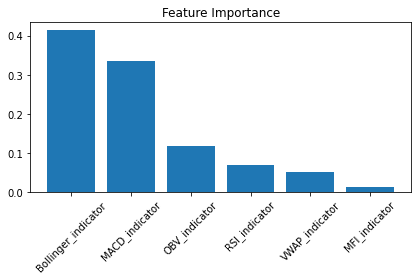

In [280]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x.shape[1]), x.columns[sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Relative Importance')

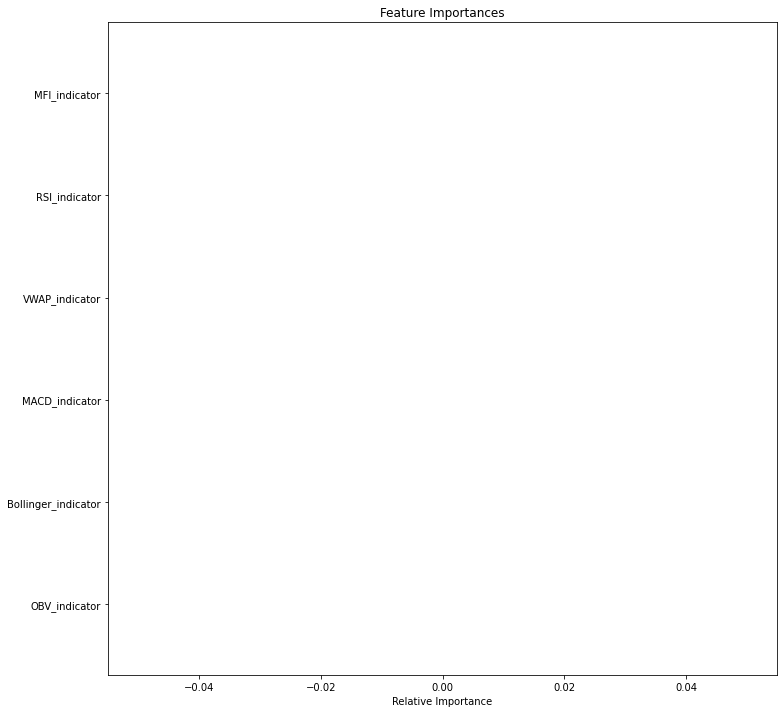

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = x_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],  color='b', align='center')
plt.yticks(range(len(indices)),labels[indices])

plt.xlabel('Relative Importance')



<h3> Linear Classifier </h3>

In [145]:
from sklearn.linear_model import SGDClassifier
model_1 = SGDClassifier(random_state=42,max_iter=1000,loss="log") 
model_1.fit(x_train,y_train) 

SGDClassifier(loss='log', random_state=42)

In [146]:
y_train

Dates
2013-02-18    1
2018-03-02    1
2012-09-19    0
2021-07-09    1
2007-07-11    0
             ..
2014-06-19    1
2019-11-27    0
2020-01-15    1
2020-09-01    0
2003-04-22    0
Name: buy_indicator, Length: 4185, dtype: int64

In [147]:
y_test_pred = model_1.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
model_1.score(x_train, y_train)

0.7364396654719235

In [149]:
model_1.score(x_test, y_test)

0.7513935340022296

In [150]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,roc_auc_score

y_test_pred = model_1.predict(x_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy_training = model_1.score(x_train,y_train)
accuracy_testing = model_1.score(x_test,y_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

y_prob = model_1.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

ap = average_precision_score(y_test, y_test_pred)

print("Confusion Matrix: \n",cfm)
print("Training accuracy: ",accuracy_training)
print("Testing  accuracy: ",accuracy_testing)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)
print("AUC: ",auc)
print("Average Precision: ", ap)

Confusion Matrix: 
 [[1283   51]
 [ 395   65]]
Training accuracy:  0.7364396654719235
Testing  accuracy:  0.7513935340022296
Precision:  0.5603448275862069
Recall:  0.14130434782608695
F1-Score:  0.22569444444444442
AUC:  0.7924736001564435
Average Precision:  0.29935753277207544


<h3> Neural Network classifier </h3>

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,roc_auc_score

from sklearn.neural_network import MLPClassifier

#clf = MLPClassifier(solver='adam', hidden_layer_sizes=(30,), max_iter = 2000, 
#                    activation='logistic',
#                    learning_rate='invscaling')

clf = MLPClassifier(solver="adam",hidden_layer_sizes=(40,), max_iter = 2000, 
                    activation='relu',
                    learning_rate='constant',random_state=42
                   )
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [153]:
# from sklearn.metrics import accuracy_score

# def get_feature_importance(j, n):
#   s = accuracy_score(y_test, y_pred) # baseline score
#   total = 0.0
#   for i in range(n):
#     perm = np.random.permutation(range(x_test.shape[0]))
#     x_test_ = x_test.copy()
#     x_test_[:, j] = x_test[perm, j]
#     y_pred_ = clf.predict(x_test_)
#     s_ij = accuracy_score(y_test, y_pred_)
#     total += s_ij
#   return s - total / n

# # get_feature_importance(j= , n= )

In [154]:
cfm = confusion_matrix(y_test,predictions)

accuracy_training = clf.score(x_train,y_train)
accuracy_testing = clf.score(x_test,y_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

y_prob = clf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

ap = average_precision_score(y_test, predictions)

print("Confusion Matrix: \n",cfm)
print("Training accuracy: ",accuracy_training)
print("Testing  accuracy: ",accuracy_testing)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)
print("AUC: ",auc)
print("Average Precision: ",ap)

Confusion Matrix: 
 [[1212  122]
 [ 353  107]]
Training accuracy:  0.7493428912783752
Testing  accuracy:  0.7352285395763657
Precision:  0.4672489082969432
Recall:  0.2326086956521739
F1-Score:  0.31059506531204645
AUC:  0.7894750994068183
Average Precision:  0.3054531602186814


## **Feature Importance**

Neural network feature importance

In [159]:
from sklearn.metrics import accuracy_score

def get_feature_importance(j, n):
  s = accuracy_score(y_test, predictions) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(x_test.shape[0]))
    x_test_ = x_test.copy()
    x_test_[:, j] = x_test[perm, j]
    y_pred_ = clf.predict(x_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

# get_feature_importance(j= , n= )

In [160]:
# Feature importances
f = []
for j in range(x_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(x_test.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(x_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Iris data set)")
plt.show()

TypeError: ignored

In [ ]:
# # Feature importances
# f = []
# for j in range(X_test.shape[1]):
#   f_j = get_feature_importance(j, 100)
#   f.append(f_j)
# # Plot
# plt.figure(figsize=(10, 5))
# plt.bar(range(X_test.shape[1]), f, color="r", alpha=0.7)
# plt.xticks(ticks=range(X_test.shape[1]))
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.title("Feature importances (Iris data set)")
# plt.show()